In [ ]:
# importing required libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r'C:\Users\MOUNISHA\Downloads\CustomerChurnPrediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.shape

(7043, 21)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Memory Optimization**

In [104]:
print("initial memory")
print("Memory used in mb",df.memory_usage(deep=True).sum()/(1024*1024))
pre=df.memory_usage(deep=True).sum()/(1024*1024)
int_columns=df.select_dtypes(include=['int']).columns
float_columns=df.select_dtypes(include=['float']).columns
for col in int_columns:
  c_min=df[col].min()
  c_max=df[col].max()
  if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
    df[col]=df[col].astype(np.int8)
  elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
    df[col]=df[col].astype(np.int16)
  elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
    df[col]=df[col].astype(np.int32)
  elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
    df[col]=df[col].astype(np.int64)
for col in float_columns:
  c_min=df[col].min()
  c_max=df[col].max()
  if c_min>np.finfo(np.float16).min and c_max<np.finfo(np.float16).max:
    df[col]=df[col].astype(np.float16)
  elif c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
    df[col]=df[col].astype(np.float32)
  else:
    df[col]=df[col].astype(np.float64)
print("final or optimized memory")
print("Memory used in mb",df.memory_usage(deep=True).sum()/(1024*1024))
post=df.memory_usage(deep=True).sum()/(1024*1024)
print("Memory reduction in %",(pre-post)/pre*100)

initial memory
Memory used in mb 1.0748023986816406
final or optimized memory
Memory used in mb 0.14789390563964844
Memory reduction in % 86.2398980667464


**Checking for Null Values**

In [ ]:
df.isna().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [44]:
df.duplicated().sum()

0

In [45]:
# Statistical summary of numerical variables

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [46]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [47]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [48]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [ ]:
#removed uncessary columns
df.drop(columns=['customerID'],axis=1,inplace=True)

**Outlier Treatment**

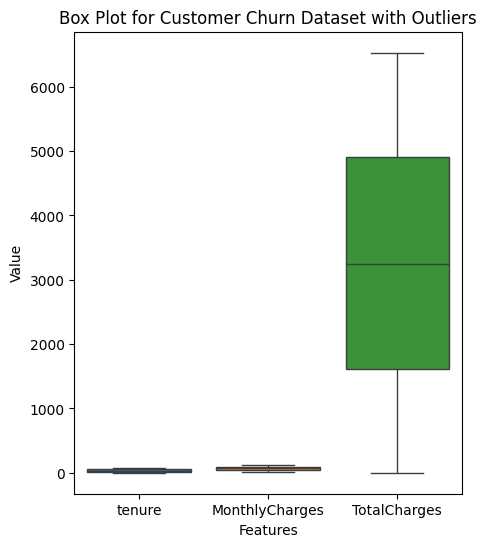

In [114]:
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a box plot for selected columns
plt.figure(figsize=(5, 6))
sns.boxplot(data=df[columns_to_plot])

# Add title and labels
plt.title('Box Plot for Customer Churn Dataset with Outliers')
plt.ylabel('Value')
plt.xlabel('Features')

# Show the plot
plt.show()

In [118]:

# Select the columns to check for outliers
columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Function to identify outliers using IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find the outliers (data points outside the bounds)
        outliers_in_column = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outliers_in_column
    
    return outliers

# Detect outliers in selected columns
outliers = detect_outliers(df, columns_to_check)

# Output the outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in column {col}:")
    print(outlier_data[[col]])
    print("\n")



Outliers in column tenure:
Empty DataFrame
Columns: [tenure]
Index: []


Outliers in column MonthlyCharges:
Empty DataFrame
Columns: [MonthlyCharges]
Index: []


Outliers in column TotalCharges:
Empty DataFrame
Columns: [TotalCharges]
Index: []




In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Label Encoding**

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoding
le = LabelEncoder()

# Apply Label Encoding to specific categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


**EDA Analysis**

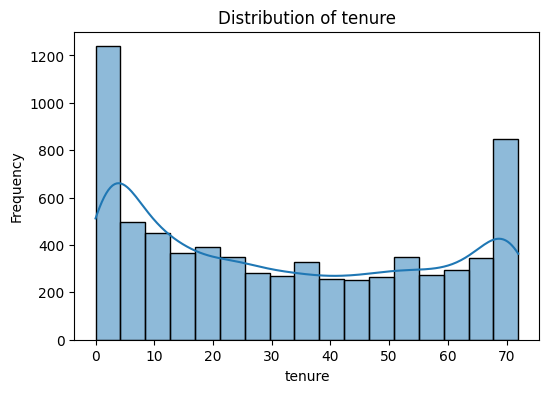

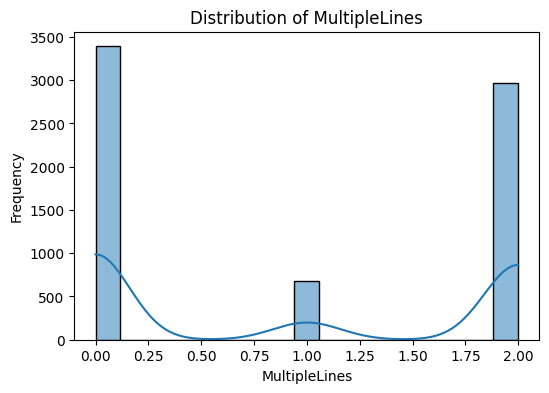

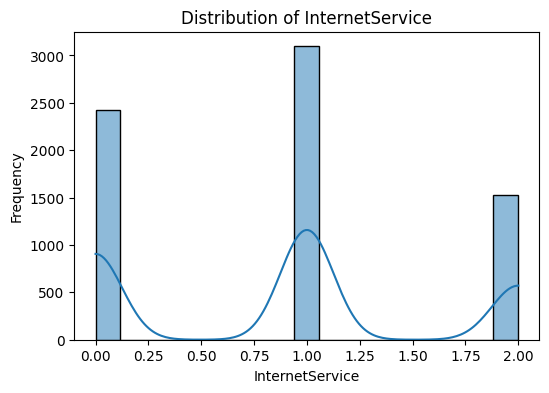

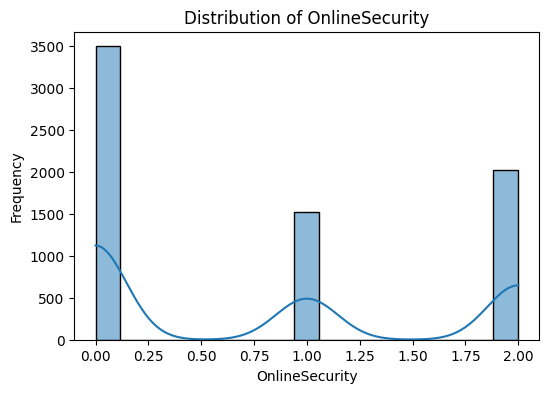

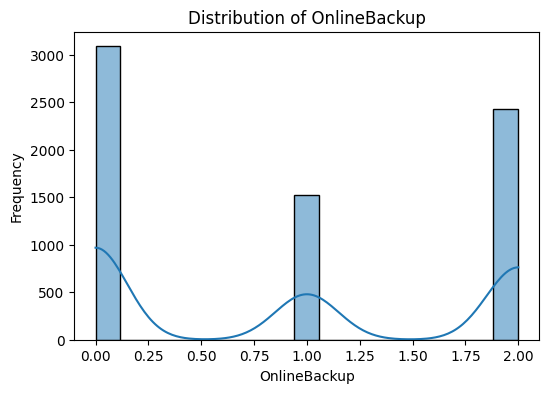

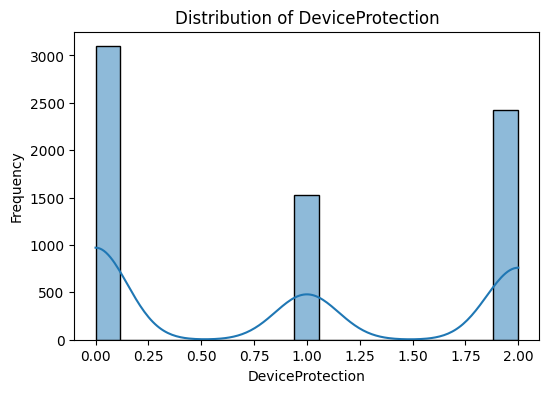

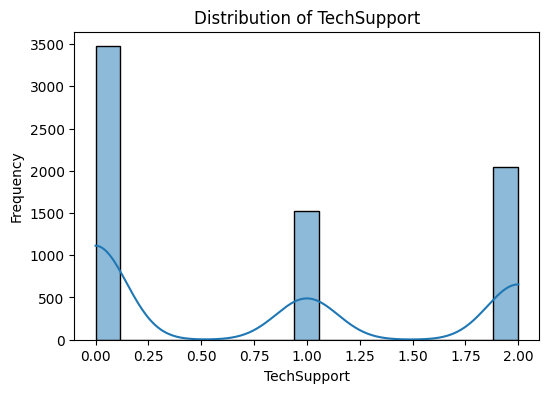

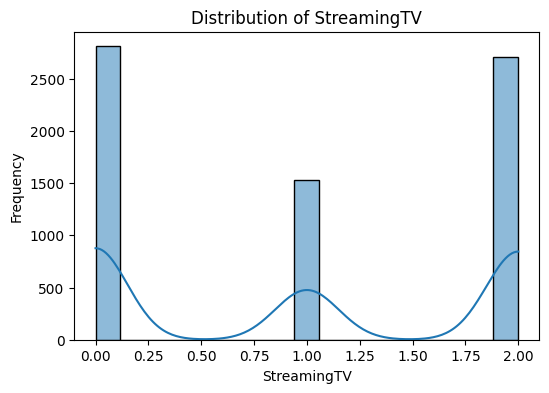

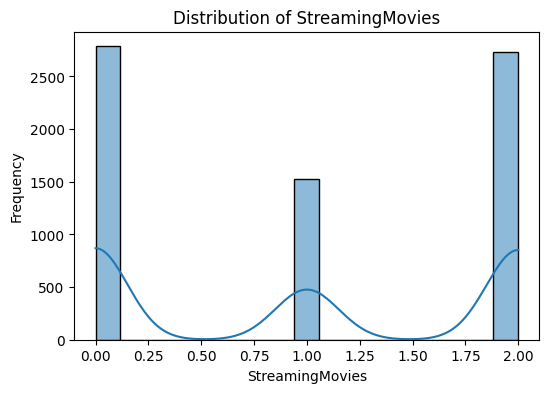

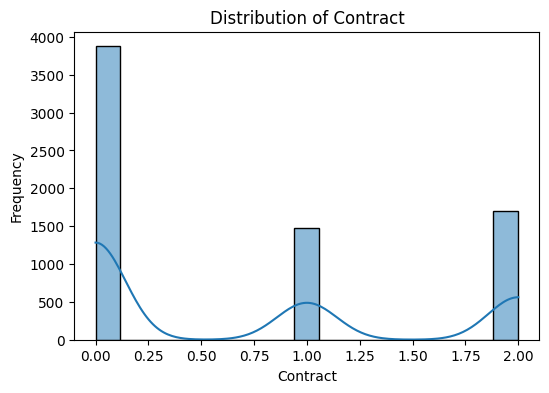

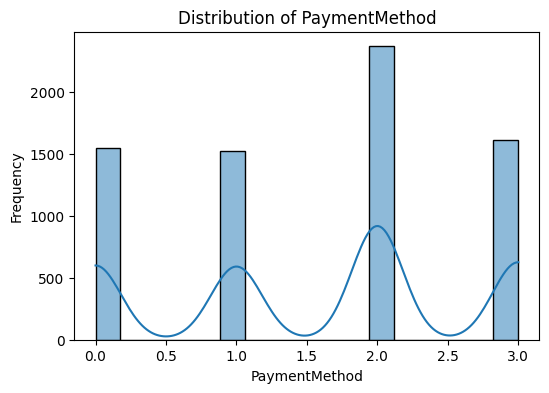

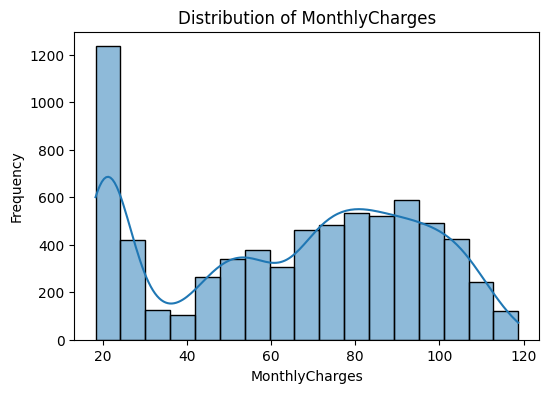

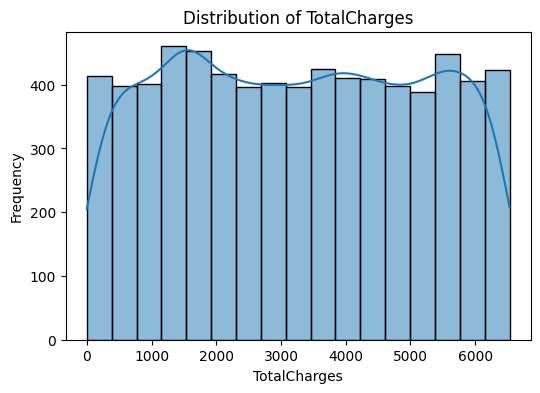

In [ ]:

# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [ ]:
**Correlation**

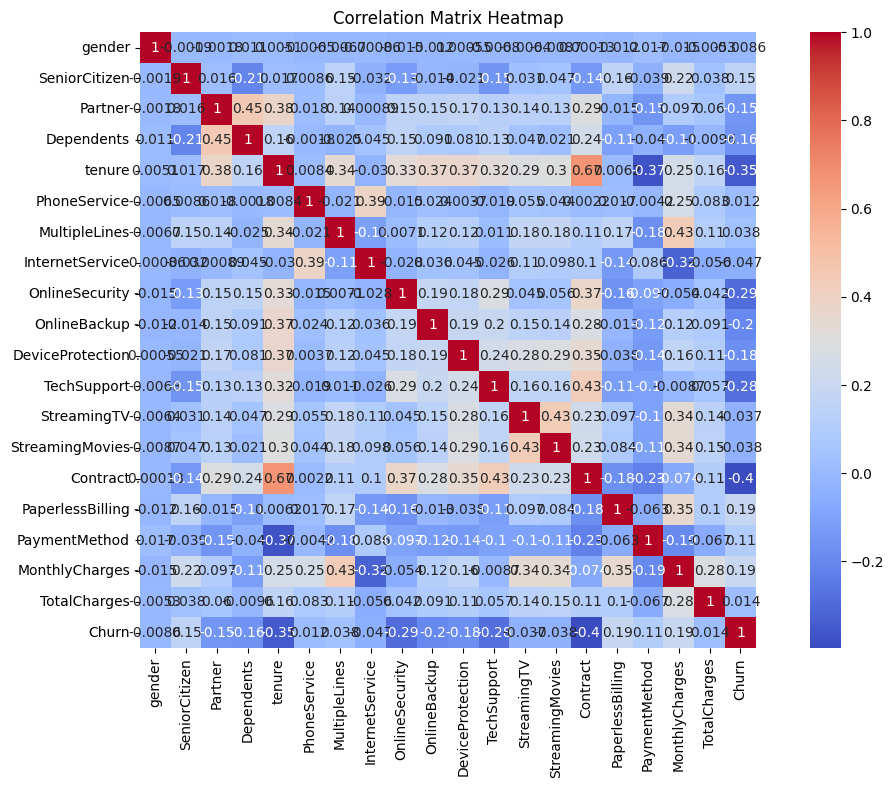

In [61]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Splitting the data into train and test**

In [ ]:
#Dividing the data into train and test set
x = df.drop("Churn",axis=1)
y = df['Churn']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [64]:
X_train.shape, y_train.shape

((4930, 19), (4930,))

In [65]:
X_test.shape, y_test.shape

((2113, 19), (2113,))

**Feature Scaling**

In [ ]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [67]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [68]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,1,0,1,1,0.750000,1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5,1,0.666667,0.522671,0.495559
1095,1,0,0,0,0.013889,1,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.666667,0.620827,0.922052
3889,1,0,0,0,0.180556,1,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0,0.333333,0.010463,0.343185
3667,0,1,1,1,0.333333,1,0.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,0.666667,0.780269,0.290965
2902,0,1,0,0,0.083333,1,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.666667,0.556552,0.586524


In [69]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,0.013889,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.666667,0.065272,0.313017
2715,1,0,0,0,0.569444,1,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1,0.000000,0.069756,0.998775
3825,0,0,1,1,0.722222,1,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0,1.000000,0.010962,0.010260
1807,0,0,0,0,0.013889,1,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.666667,0.578974,0.891577
132,1,0,0,0,0.930556,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0.000000,0.321873,0.434456


In [ ]:
#Checking for class imbalance
class_counts = df['Churn'].value_counts()
class_counts

Churn
0    5174
1    1869
Name: count, dtype: int64

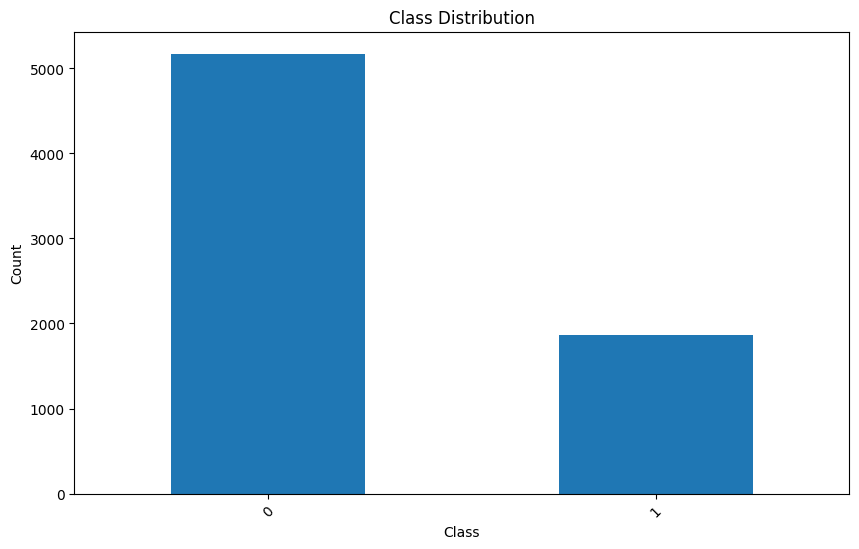

In [71]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Smote**

In [73]:
# Apply SMOTE to training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [75]:

print("Shapes after SMOTE:")
print("X_train_resampled:", X_train_resampled.shape, "y_train_resampled:", y_train_resampled.shape)

Shapes after SMOTE:
X_train_resampled: (7270, 19) y_train_resampled: (7270,)


**Feature Selection using Random Forest**

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,tenure,0.176484
1,MonthlyCharges,0.173920
2,TotalCharges,0.167420
3,Contract,0.083622
4,PaymentMethod,0.053272
5,OnlineSecurity,0.047480
6,TechSupport,0.037978
7,OnlineBackup,0.028224
8,gender,0.027745
9,InternetService,0.027230


**Model Building**

In [ ]:

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time
import pandas as pd

# Define the algorithms
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data after SMOTE
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_resampled, y_train_resampled)  # Use resampled data
    y_train_pred = algorithm.predict(X_train_resampled)  # Predict on resampled data

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
print(df_train)


c:\Users\MOUNISHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                    Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.764374   0.765661  0.764374  0.764088   
1      DecisionTreeClassifier  0.998900   0.998900  0.998900  0.998900   
2        KNeighborsClassifier  0.847043   0.861051  0.847043  0.845544   
3                  GaussianNB  0.757634   0.758564  0.757634  0.757416   
4          AdaBoostClassifier  0.818707   0.820664  0.818707  0.818430   
5  GradientBoostingClassifier  0.855158   0.856002  0.855158  0.855072   
6      RandomForestClassifier  0.998900   0.998901  0.998900  0.998900   
7               XGBClassifier  0.957084   0.957226  0.957084  0.957081   
8                         SVC  0.831912   0.833414  0.831912  0.831722   

   Building Time (s)  
0           5.728570  
1           0.108696  
2           0.696159  
3           0.048025  
4           0.694150  
5           2.411739  
6           0.571552  
7           0.346637  
8           6.701872  


In [81]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.754378,0.809050,0.754378,0.766614
1,DecisionTreeClassifier,0.728822,0.731975,0.728822,0.730326
2,KNeighborsClassifier,0.676763,0.748795,0.676763,0.693953
3,GaussianNB,0.744912,0.804305,0.744912,0.757933
4,AdaBoostClassifier,0.776148,0.805542,0.776148,0.784647
5,GradientBoostingClassifier,0.787979,0.805962,0.787979,0.794014
6,RandomForestClassifier,0.778987,0.777916,0.778987,0.778436
7,XGBClassifier,0.776148,0.778022,0.776148,0.777043
8,SVC,0.761003,0.795094,0.761003,0.770703


**Hyperparameter tuning**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,  # For progress updates
    n_jobs=-1  # Use all available processors
)

# Fit the model on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on training data with best estimator
best_gb_clf = grid_search.best_estimator_
y_train_pred = best_gb_clf.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training Accuracy with Best Estimator:", train_accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150}
Best Accuracy: 0.8651994497936727
Training Accuracy with Best Estimator: 0.8141678129298487


In [85]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

In [86]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Test Recall with Best Model: 0.5087108013937283


**Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Cross-validation using the resampled data (after SMOTE)
scores = cross_val_score(gb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())


Cross-Validation Scores (Accuracy): [0.75034388 0.7778542  0.88033012 0.87620358 0.86726272]

Mean Accuracy Score: 0.8303988995873454


In [88]:

# Cross-validation using the resampled data (after SMOTE) and recall as the scoring metric
scores = cross_val_score(gb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='recall', n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.65474553 0.69738652 0.9656121  0.95735901 0.95048143]

Mean Recall Score: 0.8451169188445666


In [ ]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier and fit on the resampled data
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training data
y_train_pred = gb_classifier.predict(X_train_resampled)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
train_f1_score = f1_score(y_train_resampled, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


  Dataset  Accuracy  Precision    Recall  F1-score
0   Train  0.855158   0.856002  0.855158  0.855072
1    Test  0.787979   0.738174  0.767060  0.748519


In [94]:
from sklearn.metrics import confusion_matrix

# Initialize the Gradient Boosting Classifier and fit on the resampled data
gradient_classifier = GradientBoostingClassifier(random_state=42)
gradient_classifier.fit(X_train_resampled, y_train_resampled)

# Calculate predictions for the resampled training set using a threshold of 0.50
train_predictions = (gradient_classifier.predict_proba(X_train_resampled)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train_resampled, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (gradient_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({
    'Training Set': train_confusion_matrix_percent.flatten(),
    'Test Set': test_confusion_matrix_percent.flatten()
}, index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)'])

print(confusion_matrix_df)


                    Training Set   Test Set
True Positive (%)      41.540578  59.204922
True Negative (%)       8.459422  13.629910
False Positive (%)      6.024759   7.572172
False Negative (%)     43.975241  19.592996


In [ ]:
#get top 10 features
import pandas as pd
import numpy as np

# Get feature importances from the trained Gradient Boosting model
feature_importances = gradient_classifier.feature_importances_

# Get the feature names (assuming your features are in X_train_resampled)
feature_names = X_train_resampled.columns

# Create a DataFrame to hold the feature names and their corresponding importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by the importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 important features
top_10_features = feature_importance_df.head(10)

print(top_10_features)


            Feature  Importance
14         Contract    0.530267
16    PaymentMethod    0.155018
4            tenure    0.080737
8    OnlineSecurity    0.059940
17   MonthlyCharges    0.048351
7   InternetService    0.048236
11      TechSupport    0.025945
6     MultipleLines    0.012817
18     TotalCharges    0.010044
13  StreamingMovies    0.009478


In [ ]:
#Saving the model to a pickle file
import pickle

# Save the trained model to a pickle file
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gradient_classifier, f)
